0.0706334 3.5035973316254436e-05
0.1062668 9.372705667774703e-05
0.14190019999999998 0.00029563381950088854
0.17753359999999999 0.0005129453928823006
0.21316699999999997 0.0009806051356341314
0.24880039999999998 0.0022366503775256732
0.28443379999999996 0.0038224410422552707
0.3200672 0.00572945647501423
0.3557005999999999 0.009452209474632746
0.39133399999999996 0.014333747625060789
0.4269674 0.022382582774001968
0.4626007999999999 0.011083614745462428
0.49823419999999996 0.014692115481894242
0.5338676 0.025813796326102388
0.5695009999999999 0.04528765384136998
0.6051344 0.059593084881635894
0.6407678 0.09320860703651189
0.6764011999999999 0.11876192249550396
0.7120346 0.16521838813189446
0.7476679999999999 0.2167011729684608
0.7833013999999999 0.2729101058733168
0.8189348 0.28235306281141265
0.8545681999999999 0.33818919906980954
0.8902015999999999 0.34777274752812193
0.925835 0.3878763165916404
0.9614683999999999 0.4368089265724327
0.9971017999999999 0.4882725399003453
1.03273519999

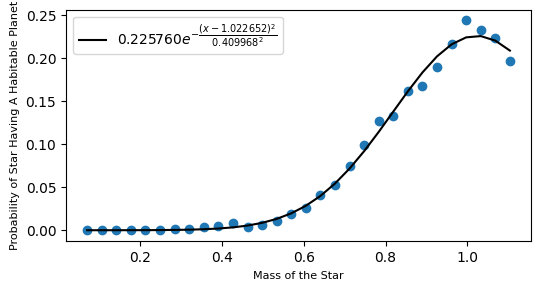

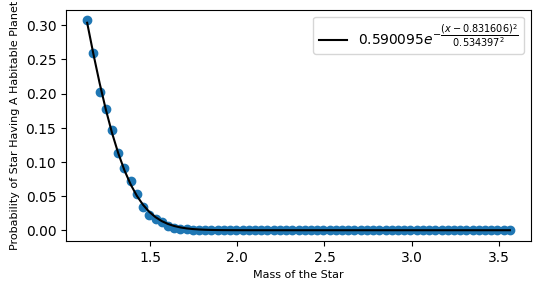

0.07588363527292535
0.0492401341632225


In [14]:
import random
import math
import numpy
from matplotlib import pyplot as plt
import scipy

max_sun_mass=3.59834
min_sun_mass=0.035

sun_num=1000

max_planet_mass=2
min_planet_mass=0

planet_num=10000

def star_mass_to_probability(mass):#enters the mass of star, outputs the mass's possibility
    if mass>=1:
        return -0.19243*mass+0.69243
    return math.log(mass,800)+0.5

def planet_mass_to_distance(planet_mass,star_mass):#inputs star mass&planet mass, outputs distance
    return (planet_mass**2)*(star_mass**0.7)*(1.03**planet_mass)

def planet_mass_to_probability(mass):#normal distribution of planet mass
    return 1/(0.25*math.sqrt(math.pi*2))*math.e**(-((mass-1)**2)/(2*(0.25)**2))

def number_of_planets(mass):#given star's mass, calculate the possible number of planets for the star
    return round(-3*0.85**mass+4)

def binomial(possibility, number, mass):#(mass)refers to mass of star
    return (1-(1-possibility)**number)*planet_mass_to_probability(mass)

class star:
    def __init__(self,mass):
        self.mass=mass
        self.planets=[]

        if mass<0.43:
            power=2.5
        elif mass<2:
            power=4
        else:
            power=3.3

        self.goldilock_max=math.sqrt(mass**power/0.53)
        self.goldilock_min=math.sqrt(mass**power/1.1)

        self.total=0
        self.yes_num=0

        self.number_of_planets=number_of_planets(mass)
        self.star_mass_to_probability=star_mass_to_probability(mass)

class planet:
    def __init__(self,mass,sun):
        self.mass=mass
        self.distance=planet_mass_to_distance(mass,sun.mass)

def generate_sun(max_sun_mass=max_sun_mass, min_sun_mass=min_sun_mass, sun_num=sun_num):#star mass generation
    result=[]

    for i in range(sun_num-1):
        masses=min_sun_mass+(max_sun_mass-min_sun_mass)/sun_num*(i+1)
        result.append(star(masses))

    return result

def generate_planet(sun, max_planet_mass=max_planet_mass, min_planet_mass=min_planet_mass, planet_num=planet_num):
    masses=[]
    weight=[]

    result=[]

    for i in range(planet_num-1):
        masses.append(min_planet_mass+(max_planet_mass-min_planet_mass)/planet_num*(i+1))
        weight.append(planet_mass_to_probability(masses[i]))

    weight=numpy.array(weight)/sum(weight)

    for i in range(planet_num):
        result.append(planet(numpy.random.choice(masses, p=weight), sun))

    return result

def gaussian(x, a, b, c):
    p = ((x-b)**2)/(2*(c**2))
    return a * numpy.exp(-p)

suns=generate_sun()

mass=[]
probability=[]

mass1=[]
probability1=[]

for i in suns:
    i.planets=generate_planet(i)
    for j in i.planets:
        i.total+=1
        if j.distance<i.goldilock_max and j.distance>i.goldilock_min:
            i.yes_num+=1

    print(i.mass, binomial(i.yes_num/i.total,i.number_of_planets,i.mass))
    if i.mass<1.122:
        mass.append(i.mass)
        probability.append(binomial(i.yes_num/i.total,i.number_of_planets,i.mass)*i.star_mass_to_probability)
    else:
        mass1.append(i.mass)
        probability1.append(binomial(i.yes_num/i.total,i.number_of_planets,i.mass)*i.star_mass_to_probability)

def latex_eq(fit):
    s = '$%f e^{-\dfrac{(x-%f)^2}{%f^2}}$' % (fit[0], fit[1], 2*fit[2])
    return s

def riemann_sum(func, param, lower, upper, N = 1000000000):
    s = 0
    int_size = (upper - lower)/N

    for k in range(0, N):
        s += func(lower + int_size * k, param[0], param[1], param[2])

    s *= int_size;

    return s

# interp
fit0, pc0 = scipy.optimize.curve_fit(gaussian, mass, probability)
fit1, pc1 = scipy.optimize.curve_fit(gaussian, mass1, probability1)

plt.figure(figsize=(6,3))
plt.xlabel("Mass of the Star",fontsize=8)
plt.ylabel("Probability of Star Having A Habitable Planet",fontsize=8)
plt.plot(mass, gaussian(mass, *fit0), color="black", label="fit")
plt.legend([latex_eq(fit0)])
plt.scatter(mass,probability)
plt.show()

plt.figure(figsize=(6,3))
plt.xlabel("Mass of the Star",fontsize=8)
plt.ylabel("Probability of Star Having A Habitable Planet",fontsize=8)
plt.plot(mass1, gaussian(mass1, *fit1), color="black", label="fit")
plt.legend([latex_eq(fit1)])
plt.scatter(mass1,probability1)
plt.show()

print(riemann_sum(gaussian, fit0, min(mass), max(mass)))
print(riemann_sum(gaussian, fit1, min(mass1), max(mass1)))